In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\Ojasjoshi\\Downloads\\vgchartz-2024.csv')        #use double slashes in directory as \ may be interpreted as escape sequnce

In [13]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [17]:
df.info()   #.info() displays summary of data. Shows us how many non null values are there, memory used etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(5), object(8)
memory usage: 6.3+ MB


In [19]:
df.describe()  #gives the statistics of the data

,critic_score,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.280000,0.120000,0.140000,0.030000
max,10.000000,9.760000,2.130000,9.850000,3.120000


In [21]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [23]:
clean_df = df.dropna()     #.dropna() by default removes all rows having null values
clean_df

,img,title,console,genre,publisher,developer,critic_score,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,/games/boxart/full_2874583AmericaFrontccc.jpg,RPG Maker: Fes,3DS,Role-Playing,NIS America,Kadokawa Games,7.0,0.03,0.02,0.00,0.00,2017-06-27,2018-04-22
11920,/games/boxart/full_4489495AmericaFrontccc.jpg,BlazBlue: Cross Tag Battle,NS,Fighting,Arc System Works,Arc System Works,8.0,0.04,0.01,0.01,0.01,2018-06-05,2018-06-06
12216,/games/boxart/full_5524695AmericaFrontccc.jpg,Disgaea 1 Complete,NS,Role-Playing,NIS America,Nippon Ichi Software,8.0,0.03,0.01,0.01,0.00,2018-10-09,2019-02-19
13198,/games/boxart/full_5198003AmericaFrontccc.jpg,GrimGrimoire,PS2,Strategy,NIS America,Vanillaware,7.7,0.01,0.03,0.01,0.00,2007-06-26,2019-01-10


In [27]:
clean_df.isnull().sum()   #cleaned the original csv file by creating it's copy and using .dropna() to remove all rows having null values.

img             0
title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64

In [91]:
clean_df["total_sales"] = clean_df["na_sales"] + clean_df["jp_sales"] + clean_df["pal_sales"] + clean_df["other_sales"] #creating new column total_sales in clean_df
df.drop("total_sales", axis=1)
#the warning is shown as we are using clean_df which is a subset of the dataset we are using

C:\Users\Ojasjoshi\AppData\Local\Temp\ipykernel_36028\709736599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["total_sales"] = clean_df["na_sales"] + clean_df["jp_sales"] + clean_df["pal_sales"] + clean_df["other_sales"] #creating new column total_sales in clean_df


,img,title,console,genre,publisher,developer,critic_score,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [73]:
#calculating mean, median and standard deviation using pandas"
clean_df.describe()

,critic_score,na_sales,jp_sales,pal_sales,other_sales,total_sales
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,7.659929,0.757589,0.106596,0.765532,0.244149,1.873865
std,1.203786,1.250511,0.157181,1.381634,0.432566,2.895955
min,3.000000,0.010000,0.000000,0.000000,0.000000,0.020000
25%,7.000000,0.140000,0.020000,0.090000,0.030000,0.370000
50%,7.900000,0.265000,0.050000,0.270000,0.060000,0.710000
75%,8.500000,0.717500,0.137500,0.612500,0.247500,1.882500
max,9.800000,8.270000,1.430000,9.710000,3.020000,19.390000


In [81]:
mean_val = np.mean(clean_df["total_sales"])
std_val = np.std(clean_df["total_sales"])
median_val = np.median(clean_df["total_sales"])

In [83]:
mean_val

1.8738652482269507

In [85]:
std_val

2.8908156637357783

In [87]:
median_val

0.71

In [98]:
clean_df[(df["total_sales"]>=13)] #shows all rows with total_sales equal to or greater than 13

C:\Users\Ojasjoshi\AppData\Local\Temp\ipykernel_36028\2703521167.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df[(df["total_sales"]>=13)] #shows all rows with total_sales equal to or greater than 13


,img,title,console,genre,publisher,developer,critic_score,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,total_sales
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,19.39
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,15.08
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,13.94
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07,13.86
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07,13.80
11,/games/boxart/full_4380292AmericaFrontccc.jpg,Call of Duty: WWII,PS4,Shooter,Activision,Sledgehammer Games,8.1,4.67,0.40,6.21,2.12,2017-11-03,2017-12-31,13.40


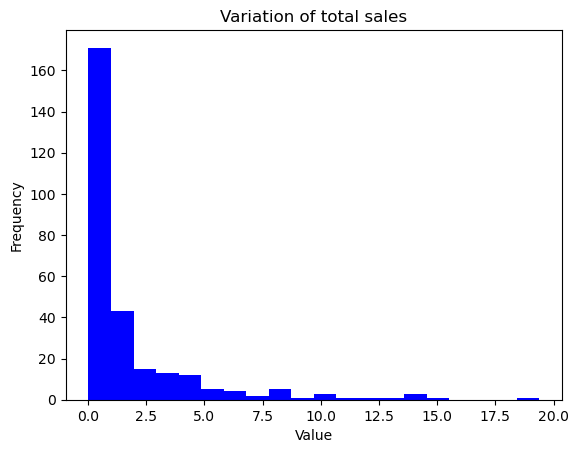

In [118]:
#histogram of total_sales
plt.hist(clean_df['total_sales'], bins=20,color='blue')   #bins: intervals in the histogram
plt.title("Variation of total sales")
plt.xlabel("Value") 
plt.ylabel("Frequency")
plt.show()

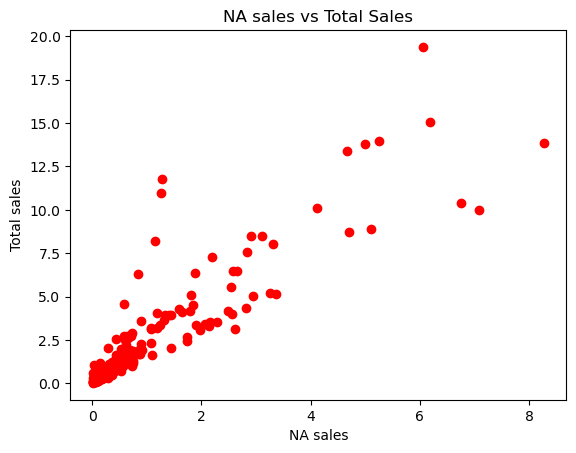

In [142]:
plt.scatter(clean_df["na_sales"],clean_df["total_sales"],alpha=1,color="red")  #alpha tells about the transparency of the dot
plt.title("NA sales vs Total Sales")
plt.xlabel("NA sales")
plt.ylabel("Total sales")
plt.show() #jupyter does it automatically no need to write plt.show()